# Câu 1

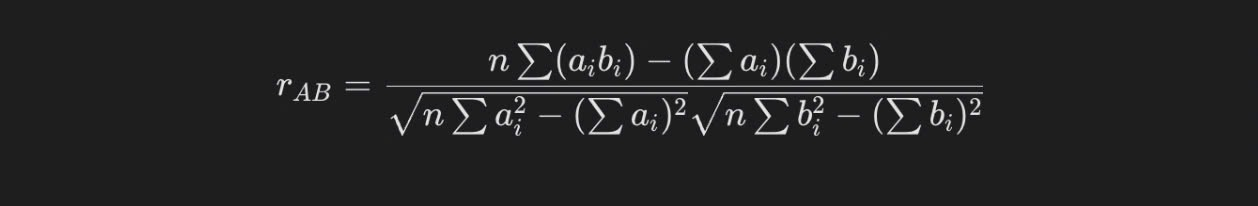

In [1]:
import pandas as pd
import numpy as np

# Giả sử có DataFrame với hai cột A và B
df = pd.DataFrame({
     'A': [10,20,30,40,50],
     'B': [1,3,5,7,9]
 })
def pearson(df, col_a, col_b):
    n = len(df)
    sum_a = df[col_a].sum()
    sum_b = df[col_b].sum()
    sum_ab = (df[col_a] * df[col_b]).sum()
    sum_a2 = (df[col_a] ** 2).sum()
    sum_b2 = (df[col_b] ** 2).sum()
    
    numerator = n * sum_ab - sum_a * sum_b
    denominator = np.sqrt((n * sum_a2 - sum_a ** 2) * (n * sum_b2 - sum_b ** 2))
    
    if denominator == 0:
        return None  # Tránh chia cho 0
    return numerator / denominator

# Sử dụng:
r = pearson(df, 'A', 'B')
print("Hệ số tương quan Pearson:", r)


Hệ số tương quan Pearson: 1.0


# Câu 2 

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Bước 1: Tạo dữ liệu ---
data = {
    'Day': ['Day 1', 'Day 2', 'Day 3', 'Day 4'],
    'A': [8, 7.5, 6, 7],
    'B': [9, 8.5, 7, 6],
    'C': [7, 7, 8, 5]
}
df = pd.DataFrame(data)

# Bước 2: Chuyển dữ liệu sang dạng dọc (long format) ---
long_df = pd.melt(df, id_vars='Day', var_name='Car', value_name='Score')

# Bước 3: Hàm phân loại điểm ---
def categorize(score):
    if score <= 6:
        return 'Low'
    elif score <= 8:
        return 'Medium'
    else:
        return 'High'

# Áp dụng phân loại
long_df['Score_Category'] = long_df['Score'].apply(categorize)

# Bước 4: Tạo bảng chéo (Car vs Score_Category) ---
table = pd.crosstab(long_df['Car'], long_df['Score_Category'])

# Bước 5: Thực hiện kiểm định Chi-squared ---
chi2_stat, p_val, dof, expected = chi2_contingency(table)

# Bước 6: In kết quả ---
print(" Bảng chéo (Contingency Table):")
print(table)

print(f" Chi-squared Statistic: {chi2_stat:.4f}")
print(f" p-value: {p_val:.4f}")
print(f" Degrees of Freedom: {dof}")



 Bảng chéo (Contingency Table):
Score_Category  High  Low  Medium
Car                              
A                  0    1       3
B                  2    1       1
C                  0    1       3
 Chi-squared Statistic: 5.1429
 p-value: 0.2730
 Degrees of Freedom: 4


# Câu 3

In [5]:
import pandas as pd
from datetime import time

# Dữ liệu mẫu
df = pd.DataFrame({
    'flight_id': [1, 2, 3],
    'departure_time': [830, 1445, 5]  # 5 = 00:05 AM, 75 = 00:75 (=> lỗi, cần xử lý)
})

# Hàm chuyển đổi số nguyên thành thời gian an toàn
def convert_to_time(val):
    try:
        val = int(val)
        hour = val // 100
        minute = val % 100
        # Kiểm tra hợp lệ
        if 0 <= hour < 24 and 0 <= minute < 60:
            return time(hour=hour, minute=minute)
        else:
            return None  
    except:
        return None

# Áp dụng hàm
df['departure_time_converted'] = df['departure_time'].apply(convert_to_time)

print(df)



   flight_id  departure_time departure_time_converted
0          1             830                 08:30:00
1          2            1445                 14:45:00
2          3               5                 00:05:00


# Câu 4

In [6]:
import pandas as pd
import numpy as np

# Bước 1: Tạo DataFrame mẫu
values = [10, 12, 11, 10, 200, 11, 9, 10, 13, 300]
df = pd.DataFrame({'value': values})

# Bước 2: Tính trung vị (median)
med = np.median(df['value'])

# Bước 3: Tính MAD (độ lệch tuyệt đối trung vị)
absolute_deviation = np.abs(df['value'] - med)
mad = np.median(absolute_deviation)

# Bước 4: Thiết lập ngưỡng phát hiện ngoại lệ
multiplier = 1.5
upper_threshold = med + multiplier * mad
lower_threshold = med - multiplier * mad

# Bước 5: Đánh dấu các giá trị ngoại lệ
df['is_outlier'] = (df['value'] > upper_threshold) | (df['value'] < lower_threshold)

# Bước 6: Xuất kết quả
print("Trung vị:", med)
print("MAD:", mad)
print("Ngưỡng trên:", upper_threshold)
print("Ngưỡng dưới:", lower_threshold)
print("\nKết quả phát hiện ngoại lệ:")
print(df)



Trung vị: 11.0
MAD: 1.0
Ngưỡng trên: 12.5
Ngưỡng dưới: 9.5

Kết quả phát hiện ngoại lệ:
   value  is_outlier
0     10       False
1     12       False
2     11       False
3     10       False
4    200        True
5     11       False
6      9        True
7     10       False
8     13        True
9    300        True


# Câu 5  

In [1]:
import pandas as pd

# Dữ liệu ban đầu
data = [
    {'last_name': 'Nguyen', 'weight': 60, 'height': 170},
    {'last_name': 'Nguyen', 'weight': 60, 'height': 168},
    {'last_name': 'Tran', 'weight': 65, 'height': 175}
]

df = pd.DataFrame(data)

# Hàm xác định có thể là cùng một người không
def is_possible_same_person(person1, person2):
    same_last_name = person1['last_name'] == person2['last_name']
    same_weight = person1['weight'] == person2['weight']
    return int(same_last_name and same_weight)

# So sánh tất cả các cặp không trùng lặp
print("🔍 So sánh các cặp người:")
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        p1, p2 = df.iloc[i], df.iloc[j]
        matched = is_possible_same_person(p1, p2)
        status = " Trùng" if matched else " Khác"
        print(f" - Người {i} và Người {j}: {status}")


🔍 So sánh các cặp người:
 - Người 0 và Người 1:  Trùng
 - Người 0 và Người 2:  Khác
 - Người 1 và Người 2:  Khác
